In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from bokeh.plotting import output_file, figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

In [3]:
from IPython.display import display

In [4]:
feat_names = []

with open('features.txt', 'r') as dataset:
    for line in dataset.readlines():
        line = line.strip('-- ')
        
        i = 0
        while(line[i] != ':'):
            i += 1
        
        feat_names.append(line[:i])

In [5]:
print(feat_names)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [6]:
df = pd.read_csv('communities.data.csv', names = feat_names, na_values=['?'])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [7]:
df.shape

(1994, 128)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
state                    int64
county                   float64
community                float64
communityname            object
fold                     int64
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackP

In [9]:
for col in list(df):
    print()
    print(col)
    print('=================')
    print(df[col].isna().sum())


state
0

county
1174

community
1177

communityname
0

fold
0

population
0

householdsize
0

racepctblack
0

racePctWhite
0

racePctAsian
0

racePctHisp
0

agePct12t21
0

agePct12t29
0

agePct16t24
0

agePct65up
0

numbUrban
0

pctUrban
0

medIncome
0

pctWWage
0

pctWFarmSelf
0

pctWInvInc
0

pctWSocSec
0

pctWPubAsst
0

pctWRetire
0

medFamInc
0

perCapInc
0

whitePerCap
0

blackPerCap
0

indianPerCap
0

AsianPerCap
0

OtherPerCap
1

HispPerCap
0

NumUnderPov
0

PctPopUnderPov
0

PctLess9thGrade
0

PctNotHSGrad
0

PctBSorMore
0

PctUnemployed
0

PctEmploy
0

PctEmplManu
0

PctEmplProfServ
0

PctOccupManu
0

PctOccupMgmtProf
0

MalePctDivorce
0

MalePctNevMarr
0

FemalePctDiv
0

TotalPctDiv
0

PersPerFam
0

PctFam2Par
0

PctKids2Par
0

PctYoungKids2Par
0

PctTeen2Par
0

PctWorkMomYoungKids
0

PctWorkMom
0

NumIlleg
0

PctIlleg
0

NumImmig
0

PctImmigRecent
0

PctImmigRec5
0

PctImmigRec8
0

PctImmigRec10
0

PctRecentImmig
0

PctRecImmig5
0

PctRecImmig8
0

PctRecImmig10
0

PctSpeakE

In [10]:
df['county'].head(20)

0       NaN
1       NaN
2       NaN
3       5.0
4      95.0
5       NaN
6       7.0
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12     21.0
13     87.0
14      NaN
15    187.0
16      1.0
17     27.0
18      NaN
19    129.0
Name: county, dtype: float64

In [11]:
county_dict = df['county'].value_counts().to_dict()
for k, v in county_dict.items():
    print(k, ':', v)

3.0 : 72
17.0 : 61
9.0 : 45
1.0 : 39
7.0 : 38
5.0 : 37
27.0 : 35
13.0 : 30
21.0 : 30
23.0 : 29
35.0 : 26
25.0 : 24
11.0 : 23
29.0 : 22
39.0 : 17
31.0 : 16
79.0 : 15
71.0 : 15
15.0 : 14
133.0 : 11
45.0 : 11
61.0 : 8
19.0 : 8
119.0 : 8
91.0 : 7
77.0 : 7
49.0 : 7
41.0 : 7
101.0 : 6
113.0 : 5
63.0 : 5
43.0 : 5
93.0 : 5
139.0 : 5
89.0 : 5
95.0 : 5
33.0 : 4
53.0 : 4
37.0 : 4
153.0 : 4
75.0 : 4
69.0 : 4
129.0 : 3
81.0 : 3
131.0 : 3
65.0 : 3
55.0 : 3
105.0 : 3
99.0 : 3
151.0 : 3
87.0 : 3
157.0 : 2
85.0 : 2
173.0 : 2
510.0 : 2
59.0 : 2
141.0 : 2
97.0 : 2
57.0 : 2
73.0 : 2
570.0 : 1
590.0 : 1
167.0 : 1
165.0 : 1
103.0 : 1
740.0 : 1
125.0 : 1
215.0 : 1
117.0 : 1
147.0 : 1
650.0 : 1
750.0 : 1
760.0 : 1
187.0 : 1
830.0 : 1
155.0 : 1
730.0 : 1
169.0 : 1
111.0 : 1
800.0 : 1
123.0 : 1
660.0 : 1
680.0 : 1
670.0 : 1
193.0 : 1
107.0 : 1
735.0 : 1
790.0 : 1
145.0 : 1
700.0 : 1
181.0 : 1
143.0 : 1
550.0 : 1
163.0 : 1
820.0 : 1
710.0 : 1
135.0 : 1
690.0 : 1
683.0 : 1
810.0 : 1
630.0 : 1
770.0 : 1
840.0 : 1


In [12]:
fig = figure(title = 'county hist', x_axis_label = 'county value', y_axis_label = 'occurance', plot_width = 700)

for k, v in county_dict.items():
    fig.line([k, k], [0, v])

In [13]:
output_notebook()
show(fig)

Loading BokehJS ...

In [14]:
tmp = df['county'].value_counts()[df['county'].value_counts().index > 350]
display(tmp)
print(tmp.sum())

510.0    2
570.0    1
590.0    1
740.0    1
650.0    1
750.0    1
760.0    1
830.0    1
730.0    1
800.0    1
660.0    1
680.0    1
670.0    1
735.0    1
790.0    1
700.0    1
550.0    1
820.0    1
710.0    1
690.0    1
683.0    1
810.0    1
630.0    1
770.0    1
840.0    1
775.0    1
Name: county, dtype: int64

27


In [15]:
df.loc[df['county'] > 350, 'county'] = -1

In [16]:
for k, v in df['county'].value_counts().to_dict().items():
    print(k, ':', v)

3.0 : 72
17.0 : 61
9.0 : 45
1.0 : 39
7.0 : 38
5.0 : 37
27.0 : 35
21.0 : 30
13.0 : 30
23.0 : 29
-1.0 : 27
35.0 : 26
25.0 : 24
11.0 : 23
29.0 : 22
39.0 : 17
31.0 : 16
79.0 : 15
71.0 : 15
15.0 : 14
133.0 : 11
45.0 : 11
19.0 : 8
119.0 : 8
61.0 : 8
49.0 : 7
91.0 : 7
41.0 : 7
77.0 : 7
101.0 : 6
43.0 : 5
63.0 : 5
95.0 : 5
139.0 : 5
89.0 : 5
113.0 : 5
93.0 : 5
69.0 : 4
153.0 : 4
33.0 : 4
53.0 : 4
75.0 : 4
37.0 : 4
105.0 : 3
131.0 : 3
81.0 : 3
87.0 : 3
55.0 : 3
151.0 : 3
129.0 : 3
99.0 : 3
65.0 : 3
57.0 : 2
157.0 : 2
59.0 : 2
85.0 : 2
141.0 : 2
73.0 : 2
97.0 : 2
173.0 : 2
143.0 : 1
215.0 : 1
169.0 : 1
155.0 : 1
187.0 : 1
67.0 : 1
127.0 : 1
121.0 : 1
109.0 : 1
123.0 : 1
107.0 : 1
103.0 : 1
193.0 : 1
145.0 : 1
147.0 : 1
181.0 : 1
163.0 : 1
165.0 : 1
135.0 : 1
117.0 : 1
111.0 : 1
125.0 : 1
167.0 : 1


In [17]:
fig = figure(title = 'Communities county hist', x_axis_label = 'value', y_axis_label = 'occurance',
            plot_width = 700)

for k, v in df['county'].value_counts().to_dict().items():
    fig.line([k, k], [0, v], color = 'steelblue')

show(fig)

In [18]:
county_mean = df['county'].mean()
print(county_mean)

county_std = df['county'].std()
print(county_std)

35.68048780487805
40.494867517304655


In [19]:
# df.fillna({'county': county_mean}, inplace = True)

In [20]:
fig = figure(title = 'Communities county hist', x_axis_label = 'value', y_axis_label = 'occurance',
            plot_width = 700)

for k, v in df['county'].value_counts().to_dict().items():
    fig.line([k, k], [0, v], color = 'steelblue')

show(fig)

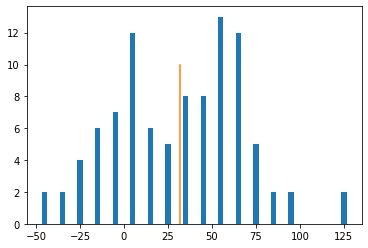

In [35]:
plt.hist(np.random.normal(county_mean, county_std, size = (100,)), rwidth = 0.3, bins = range(-50, 135, 10))
plt.plot([county_mean*9/10, county_mean*9/10], [0, 10])